In [1]:
import time
import datetime
import numpy as np

from numpy import mean
from numpy import std
import pandas as pd
from datetime import timedelta

from sklearn.svm import SVC
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import rcParams

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
data = pd.read_csv("cardio_train.csv")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,18393,2,168,62,0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,0,100,60,1,1,0,0,0,0


In [4]:
data["age"] = round(data["age"] / 365)

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,50.0,2,168,62,0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85,0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64,0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82,0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56,0,100,60,1,1,0,0,0,0


In [6]:
data.shape

(70000, 14)

In [7]:
X=data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']] 

y=data['output']

data_categorical = data.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]

# X=data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']] 
# y=data['output']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  int64  
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  output       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [9]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.204329,0.018757,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395953,0.701293,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,0.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,94.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Age is measured in days, height is in centimeters. Let's look ate the numerical variables and how are they spread among target class. For example, at what age does the number of people with CVD exceed the number of people without CVD?



# The ISNULL() function returns a specified value if the expression is NULL. If the expression is NOT NULL, this function returns the expression.

In [10]:
data.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# While the chain of .isnull().values.any() will work for a DataFrame object to indicate if any value is missing, in some cases it may be useful to also count the number of missing values across the entire DataFrame.

In [11]:
data.isnull().values.any()

False

# In some cases, you may wish to determine how many missing values exist in the collection, in which case you can use .sum() chained on:

In [12]:
data.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
output         0
dtype: int64

# In order to get the total summation of all missing values in the DataFrame, we chain two .sum() methods together:

In [13]:
data.isnull().sum().sum()

0

# BMI Calculation

In [14]:
data['BMI'] = data['weight']/((data['height']/100)**2)

In [15]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output,BMI
0,0,50.0,2,168,62,0,110,80,1,1,0,0,1,0,21.967120
1,1,55.0,1,156,85,0,140,90,3,1,0,0,1,1,34.927679
2,2,52.0,1,165,64,0,130,70,3,1,0,0,0,1,23.507805
3,3,48.0,2,169,82,0,150,100,1,1,0,0,1,1,28.710479
4,4,48.0,1,156,56,0,100,60,1,1,0,0,0,0,23.011177


## Age Status Calculate

In [16]:
data.loc[(data["age"] < 18), "AGE_Status"] = "Young"
data.loc[(data["age"] > 18) & (data["age"] < 56), "AGE_Status"] = "Mature"
data.loc[(data["age"] >= 56), "AGE_Status"] = "Old"
data['AGE_Status'].value_counts()

Mature    39560
Old       30440
Name: AGE_Status, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  int64  
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  output       70000 non-null  int64  
 14  BMI          70000 non-null  float64
 15  AGE_Status   70000 non-null  object 
dtypes: float64(2), int64(13), object(1)
memory usage: 8.5+ MB


In [18]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output,BMI,AGE_Status
0,0,50.0,2,168,62,0,110,80,1,1,0,0,1,0,21.967120,Mature
1,1,55.0,1,156,85,0,140,90,3,1,0,0,1,1,34.927679,Mature
2,2,52.0,1,165,64,0,130,70,3,1,0,0,0,1,23.507805,Mature
3,3,48.0,2,169,82,0,150,100,1,1,0,0,1,1,28.710479,Mature
4,4,48.0,1,156,56,0,100,60,1,1,0,0,0,0,23.011177,Mature


## Blood Pressure Status Calculate

In [19]:
data.loc[(data["ap_lo"])<=89, "BLOOD_PRESSURE"] = "normal"
data.loc[(data["ap_lo"])>=90, "BLOOD_PRESSURE"] = "hyper"
data.loc[(data["ap_hi"])<=120, "BLOOD_PRESSURE"] = "normal"
data.loc[(data["ap_hi"])>120, "BLOOD_PRESSURE"] = "normal"
data.loc[(data["ap_hi"])>=140, "BLOOD_PRESSURE"] = "hyper"

In [20]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output,BMI,AGE_Status,BLOOD_PRESSURE
0,0,50.0,2,168,62,0,110,80,1,1,0,0,1,0,21.967120,Mature,normal
1,1,55.0,1,156,85,0,140,90,3,1,0,0,1,1,34.927679,Mature,normal
2,2,52.0,1,165,64,0,130,70,3,1,0,0,0,1,23.507805,Mature,normal
3,3,48.0,2,169,82,0,150,100,1,1,0,0,1,1,28.710479,Mature,normal
4,4,48.0,1,156,56,0,100,60,1,1,0,0,0,0,23.011177,Mature,normal


# Gender Calculation

In [21]:
data['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

### To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [22]:
data.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

# Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women. 

### If we look more closely to height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers. Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

In [23]:
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In [24]:
# X=data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio', 'BMI']] 

# y=data['output']

# data_categorical = data.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]

In [25]:
ohe_cols = [col for col in data.columns if 10 >= len(data[col].unique()) > 2]
ohe_cols
print(data['gluc'].unique())

[1 3 2]


In [26]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output,BMI,AGE_Status,BLOOD_PRESSURE
0,0,50.0,2,168,62,0,110,80,1,1,0,0,1,0,21.967120,Mature,normal
1,1,55.0,1,156,85,0,140,90,3,1,0,0,1,1,34.927679,Mature,normal
2,2,52.0,1,165,64,0,130,70,3,1,0,0,0,1,23.507805,Mature,normal
3,3,48.0,2,169,82,0,150,100,1,1,0,0,1,1,28.710479,Mature,normal
4,4,48.0,1,156,56,0,100,60,1,1,0,0,0,0,23.011177,Mature,normal


# Checking Duplicate Values and Dropping Duplicate Values

In [27]:
data.duplicated().sum()

0

In [28]:
data.drop_duplicates(inplace=True)

# For Test Train and Data Min Max

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

# Random Forest

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
clf=RandomForestClassifier(n_estimators=100)

In [32]:
# a = datetime.datetime.now().replace(microsecond=0)
clf.fit(X_train,y_train)
# b = datetime.datetime.now().replace(microsecond=0)
# print(b-a)

RandomForestClassifier()

In [33]:
a = datetime.datetime.now()
y_pred=clf.predict(X_test)
b = datetime.datetime.now()
rf_time = (b-a)
rf_ac = metrics.accuracy_score(y_test, y_pred)
rf_run_time = rf_time / datetime.timedelta(microseconds=1)

print(type(rf_run_time))
print(rf_run_time)
print('Random Forest Time Duration - ',b-a)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_pred))

<class 'float'>
859737.0
Random Forest Time Duration -  0:00:00.859737
Random Forest Accuracy: 0.7062857142857143


In [34]:
# a = datetime.datetime.now()
# b = datetime.datetime.now()
# print(b-a)

# Before Remove weights and heights, that fall below 2.5% or above 97.5%

# 776924.0
# Random Forest Time Duration -  0:00:00.776924
# Random Forest Accuracy: 0.712952380952381

# After Remove weights and heights, that fall below 2.5% or above 97.5%

# 735608.0
# Random Forest Time Duration -  0:00:00.735608
# Random Forest Accuracy: 0.7108095238095238

# SVM

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [36]:
# Feature Scaling --- bhul
# min std ---> 
# hyper perameter ---> alpha, theta value
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [37]:
# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [38]:
# Mode performance
a = datetime.datetime.now()
y_pred = svm.predict(X_test_std)
b = datetime.datetime.now()

svm_ac = accuracy_score(y_test, y_pred)

svm_time = b-a
svm_time_run_time = svm_time / datetime.timedelta(microseconds=1)
print(svm_time_run_time)

# print(type(accuracy_score(y_test, y_pred)))
print('SVM Time Duration - ',b-a)
print('SVM Accuracy: %.3f' % accuracy_score(y_test, y_pred))

26496497.0
SVM Time Duration -  0:00:26.496497
SVM Accuracy: 0.724


In [39]:
# Before remove weights and heights, that fall below 2.5% or above 97.5%

# 25441129.0
# SVM Time Duration -  0:00:25.441129
# SVM Accuracy: 0.724

# After remove weights and heights, that fall below 2.5% or above 97.5%

# 21311031.0
# SVM Time Duration -  0:00:21.311031
# SVM Accuracy: 0.724


# SVM SGDClassifier 

In [40]:
# Instantiate SVM classifier using SGDClassifier
svm = SGDClassifier(loss='hinge')
 
# Fit the model
svm.fit(X_train_std, y_train)
 
# Model Performance
a = datetime.datetime.now()
y_pred = svm.predict(X_test_std)
b = datetime.datetime.now()


sgdc_ac = accuracy_score(y_test, y_pred)

sgdc_time = b-a
sgdc_time_run_time = sgdc_time / datetime.timedelta(microseconds=1)
print(sgdc_time_run_time)

print(sgdc_ac)
print('SVM SGDClassifier - ',b-a)
print('SVM SGDClassifier Accuracy: %.3f' % accuracy_score(y_test, y_pred))

19947.0
0.7249523809523809
SVM SGDClassifier -  0:00:00.019947
SVM SGDClassifier Accuracy: 0.725


In [41]:
# Before remove weights and heights, that fall below 2.5% or above 97.5%

# 0.7218571428571429
# SVM SGDClassifier -  0:00:00.017952
# SVM SGDClassifier Accuracy: 0.722

# After remove weights and heights, that fall below 2.5% or above 97.5%

# 0.7205238095238096
# SVM SGDClassifier -  0:00:00.041680
# SVM SGDClassifier Accuracy: 0.721

# KNN.Model Evaluation for k=5

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
#Predict the response for test dataset
a = datetime.datetime.now()
y_pred = knn.predict(X_test)
b = datetime.datetime.now()

knn_five_time = b-a
knn_five_ac = metrics.accuracy_score(y_test, y_pred)



print(type(knn_five_ac))

knn_five_time = b-a
knn_five_time_run_time = knn_five_time / datetime.timedelta(microseconds=1)
print(knn_five_time_run_time)


print('KNN k=5 Time Duration- ',b-a)
print("KNN k=5 Accuracy:",metrics.accuracy_score(y_test, y_pred))

<class 'numpy.float64'>
3125420.0
KNN k=5 Time Duration-  0:00:03.125420
KNN k=5 Accuracy: 0.6883333333333334


# KNN Re-generating Model for K=7

In [44]:
knn = KNeighborsClassifier(n_neighbors=7)
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

a = datetime.datetime.now()
y_pred = knn.predict(X_test)
b = datetime.datetime.now()

knn_seven_ac = metrics.accuracy_score(y_test, y_pred)

knn_seven_time = b-a
knn_seven_time_run_time = knn_seven_time / datetime.timedelta(microseconds=1)
print(knn_seven_time_run_time)


print('KNN k=7 Time Duration- ',b-a)
print("KNN k=7 Accuracy:",metrics.accuracy_score(y_test, y_pred))  

3753119.0
KNN k=7 Time Duration-  0:00:03.753119
KNN k=7 Accuracy: 0.6975714285714286


# Gradient Boosting Machine for Classification using repeated k-fold cross-validation and reports the mean accuracy.

In [45]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# fit the model on the whole dataset
model = GradientBoostingClassifier()
a = datetime.datetime.now()
model.fit(X, y)
b = datetime.datetime.now()

gb_time_classification = b-a
gb_time_classification_ac = (mean(n_scores))
gb_time_c_std_ac = std(n_scores)
# print(gb_time_c_std_ac)
# print(mean(n_scores))


gb_time_classification_run_time = gb_time_classification / datetime.timedelta(microseconds=1)
print(gb_time_classification_run_time)

print('Gradient Boosting Machine for Classification Time Duation- ',b-a)
print('Gradient Boosting Machine Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


380513.0
Gradient Boosting Machine for Classification Time Duation-  0:00:00.380513
Gradient Boosting Machine Accuracy: 0.914 (0.024)


# Gradient Boosting Machine for Regression using repeated k-fold cross-validation and reports the mean absolute error.

In [46]:
# # define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# # evaluate the model
# model = GradientBoostingRegressor()
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')


# # fit the model on the whole dataset
# model = GradientBoostingRegressor()
# a = datetime.datetime.now()
# model.fit(X, y)
# b = datetime.datetime.now()
# gb_regressor = b-a
# gb_reg_ac = (mean(n_scores))
# gb_reg_s_ac = (std(n_scores))
# print(gb_reg_ac)

# print('Gradient Boosting Machine for Regression Time Duation- ',b-a)
# print('Gradient Boosting Machine for Regression : %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# # -11.859598218915728
# # Gradient Boosting Machine for Regression Time Duation-  0:00:00.283241
# # Gradient Boosting Machine for Regression : -11.860 (1.130)

# K means

In [47]:


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# a = datetime.datetime.now()
# kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
# kmeans.fit(X)
# b = datetime.datetime.now()

# kmeans_time = b-a

# print('K mean time duration -',b-a)

# Naive Bayes

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
a = datetime.datetime.now()
y_pred = gnb.predict(X_test)
b = datetime.datetime.now()

nb_time = b-a
nb_run_time = nb_time / datetime.timedelta(microseconds=1)
print(nb_run_time)

print('Naive Bayes Time Duration', b-a)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

995.0
Naive Bayes Time Duration 0:00:00.000995
Accuracy: 0.76


# Decision Tree

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)
a = datetime.datetime.now()
y_pred = clf.predict(X_test)
b = datetime.datetime.now()

dt_time = b-a
dt_ac = metrics.accuracy_score(y_test, y_pred)

dt_time = b-a
dt_run_time = dt_time / datetime.timedelta(microseconds=1)
print(dt_run_time)

print('Decision Tree Time Duration',b-a)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

1002.0
Decision Tree Time Duration 0:00:00.001002
Accuracy: 0.8566666666666667


# Ploting Accuracy

In [51]:
# fig = plt.figure(figsize = (15, 5))
# # Accuray_List = [rf_time, svm_time, sgdc_time, knn_five_time, knn_seven_time, gb_time_classification, gb_regressor, kmeans_time, nb_time, dt_time]
# algo = ['Random Forest', 'SVM', 'SVM \nSGDClassifier', 'KNN=5', 'KNN=7', 'Gradient \n Boosting \n Classification \n (Mean)', 'Gradient \n Boosting \n Classification \n (STD)',  'Naive Bayes', 'Decision Tree']

# algo_accuracy = [rf_ac, svm_ac, sgdc_ac, knn_five_ac, knn_seven_ac, gb_time_classification_ac, gb_time_c_std_ac, nb_ac, dt_ac]

# plt.bar(algo, algo_accuracy, color ='blue', width=0.8)
 
# print(type(knn_five_time))
# plt.xlabel("\n\nAlgorithm")
# plt.ylabel("Accuracy")
# plt.title("Accuracy Time of Every Algorithm")
# plt.show()

# Plotting Run Time of every Algorithm (Microseconds)

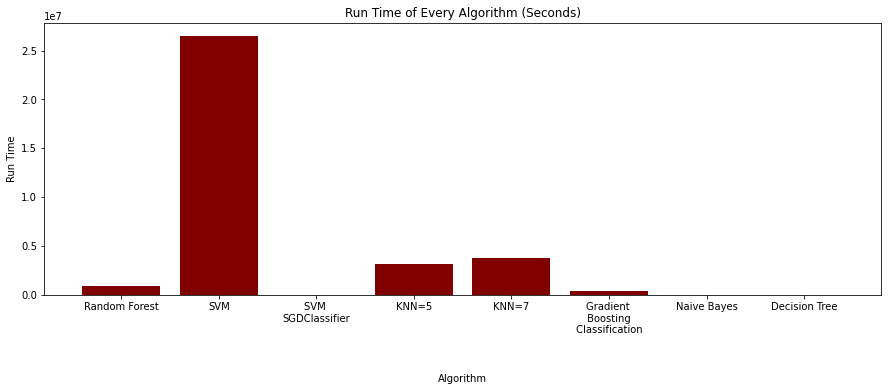

In [52]:
fig = plt.figure(figsize = (15, 5))
algo = ['Random Forest', 'SVM', 'SVM \nSGDClassifier', 'KNN=5', 'KNN=7', 'Gradient \n Boosting \n Classification \n', 'Naive Bayes', 'Decision Tree']

algo_run_time = [rf_run_time, svm_time_run_time, sgdc_time_run_time, knn_five_time_run_time, knn_seven_time_run_time, gb_time_classification_run_time, nb_run_time, dt_run_time]

plt.bar(algo, algo_run_time , color ='maroon', width=0.8)
 

plt.xlabel("\n\nAlgorithm")
plt.ylabel("Run Time")
plt.title("Run Time of Every Algorithm (Seconds)")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

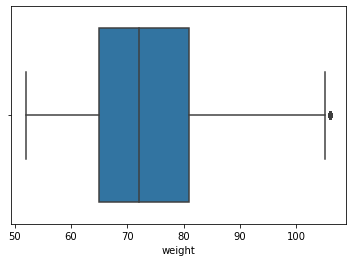

In [55]:
import seaborn as sn
# X=data[['height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']] 
sn.boxplot(data['weight'])